In [6]:
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
import os
import random
import torch
import torchvision.transforms as transforms
import torchvision
import  matplotlib.pyplot as plt

In [7]:
DATA_ROOT = "../data"
test_root = os.path.join(DATA_ROOT, "raw\Test")
train_root = os.path.join(DATA_ROOT, "raw\Train")

In [8]:
class ImageClassificationDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform # TODO 
        self.image_paths = os.listdir(root)
        self.classes = [p.split("_")[1].split(".")[0] for p in self.image_paths]
        self.classes_unique = set(self.classes)
        self.ind_to_class = {ind:cl for ind,cl in enumerate(self.classes_unique)}
        self.class_to_ind = {value:key for key, value in self.ind_to_class.items()}
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, index):
        image_path = self.image_paths[index]
        full_image_path = os.path.join(self.root, image_path)
        label_name = image_path.split("_")[1].split(".")[0] # OR: label = self.classes[index]
        label = self.class_to_ind[label_name]
        img = Image.open(full_image_path).convert(mode = "RGB") #OR: .convert(mode = "L") because greyscale (but then transform need to match)
        if self.transform is not None:
            img = self.transform(img)
        return img, label

In [13]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
# transform = None

In [14]:
full_train_dataset = ImageClassificationDataset(train_root, transform=transform)
test_dataset = ImageClassificationDataset(test_root, transform=transform)

In [15]:
def imshow(img):
    print(type(img))
    img = img / 2 + 0.5 #if denormalization is needed
    npimg = np.array(img)
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

<class 'torch.Tensor'>


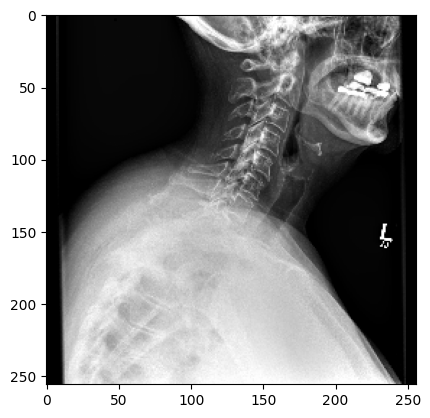

In [16]:
sample,label = full_train_dataset[0]
imshow(sample)

In [19]:
sample.size()

torch.Size([3, 256, 256])